# Mesure de la focale d'une lentille convergente en exploitant la relation de conjugaison
## Version 2 (JB)

In [1]:
# Import des librairies 
import numpy as np
import matplotlib.pyplot as plt
import fitutils as fu
import numpy.random as rd

In [2]:
# Données mesurées
# On note les positions indiquées par la règle, en cm
# L'objet est placé à l'origine (x=0 cm)

x_lent = np.array([29.5, 71.5, 60, 53.5, 45.5, 40, 34.5]) # position de la lentille
d_x_lent = 0.1 # étendue possible pour la position de la lentille
x_ecr_min = np.array([93.5, 99.6, 90.2, 85.7, 81.6, 80.5, 83.2]) # position minimale de l'écran dans la plage de netteté
x_ecr_max = np.array([95,   99.9, 90.6, 86,   82,   80.9, 84.1]) # position maximale de l'écran dans la plage de netteté
t_min = np.array([7.5,  1.4, 1.7, 2,   2.7,  3.4,  4.6]) # estimation de la taille maximale de l'image
t_max = np.array([7.75, 1.6, 1.8, 2.1, 2.75, 3.55, 4.8]) # estimation de la taille minimale de l'image
t0 = 3.475

### Première analyse, niveau première

L'idée est ici de considérer qu'on a 7 observations indépendantes de la focale. La prise en compte des incertitudes de mesure n'est pas forcément nécessaire, puisque des 7 observations nait une variabilité suffisante pour déterminer l'incertitude !

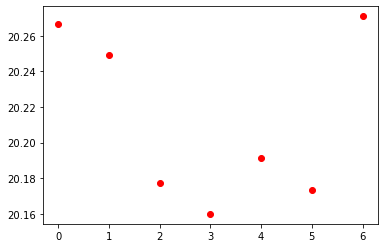

f' = 20.212669566109955  u(f') = 0.018071236932367975


In [3]:
# Première tentative d'analyse : f' = 1/(1/OA'+1/OA) (en prenant les distances)
# OA' = x_ecr - x_len

x_ecr = (x_ecr_min + x_ecr_max)/2 # calcul de la position de l'écran
d_ecr = x_ecr - x_lent # calcul de OA'
foc = 1/(1/d_ecr+1/x_lent) # calcul de la focale
plt.plot(foc, 'or') # représentation des valeurs obtenues
plt.show() # affichage de la figure
f_val = np.mean(foc) # calcul de la valeur mesurée
uf = np.std(foc, ddof=1)/np.sqrt(np.size(foc)) # calcul de l'incertitude-type par une méthode de type A
print("f' =",f_val, " u(f') =", uf) # affichage du résultat


### Seconde analyse, niveau terminale

En seconde analyse, on cherche à utiliser tous les éléments à notre disposition : 
les incertitudes liées à chaque observation doivent entrer en ligne de compte. Pour cela on fait une simulation Monte Carlo. Chacune des 7 observations réalisées va être dupliquée 10000 fois, en rajoutant ou soustrayant une distance qu'on pense plausible. Pour chacune des 7 observations répliquées, on calcule la moyenne et l'écart-type, et on les représente (3 diagrammes).

Ensuite, pour extraire la focale et son incertitude-type, il y a deux manières de procéder : 
1. Naïvement, on peut considérer que les 7 moyennes représentent les "meilleures" valeurs des 7 focales, qu'on peut alors moyenner. Évidemment ces 7 moyennes sont très proches des 7 obervations déjà réalisées, et on n'y a pas gagné grand chose.
2. On a 7 moyennes et 7 écarts-types, qu'on peut combiner optimalement dans une moyenne pondérée par l'inverse des variances, et dont on estime l'écart-type : $$\bar{x} = \dfrac{\sum_{i=0}^6 \dfrac{x_i}{u(x_i)^2}}{\sum_{i=0}^6 \dfrac{1}{u(x_i)^2}}, \quad  u(\bar{x}) = \dfrac{1}{\sum_{i=0}^6 \dfrac{1}{u(x_i)^2}   } $$

[20.28484099 20.22728393 20.16015551 20.14723701 20.18536807 20.17365927
 20.27940195] [0.04336806 0.04618024 0.05160188 0.03431372 0.03572737 0.02820353
 0.04414824]


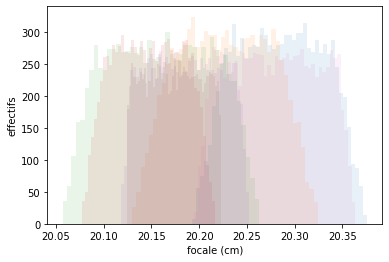

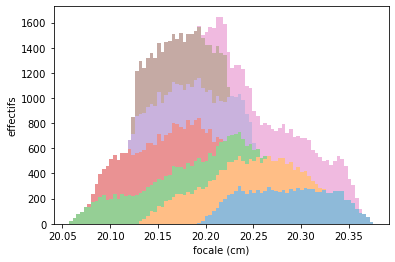

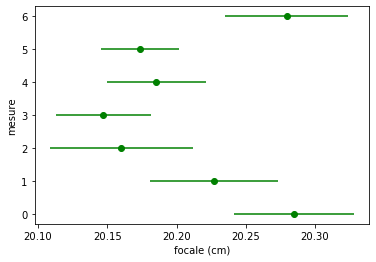

Naïvement :  f' = 20.208278102811125  u(f') = 0.021295444923171265
Scientifiquement :  f' = 20.213866942733603  u(f') = 0.01446525939726905


In [16]:
# Deuxième tentative en prenant en compte les incertitudes de la mesure des valeurs

# initialisation
N_sim = 10000 # nombre de simulations à faire
foc_MC = np.zeros((N_sim, 7)) # un vecteur qui contient les 7 focales
# remarque : on peut ne pas vectoriser le core en répétant 7 fois la simulation MC

for i in range(N_sim):
    x_ecr_MC = x_ecr_min + rd.uniform(0, 1) * (x_ecr_max - x_ecr_min) # simulation de position de l'écran
    x_lent_MC = x_lent + rd.uniform(0, 1) * d_x_lent # simulation de position de la lentille
    d_ecr_MC = x_ecr_MC - x_lent_MC # calcul de OA' simulé
    foc_MC[i] = 1 / (1/d_ecr_MC+1/x_lent_MC) # calcul des 7 focales sur la base des mesures simulées

# extraction des résultats

foc_res_MC = np.mean(foc_MC, axis=0) # moyenne de toutes les focales MC
u_foc_res_MC = np.std(foc_MC, axis=0, ddof=1) # écart-type de toutes les focales MC
print(foc_res_MC, u_foc_res_MC) # pour afficher le résultat des simulations

# représentation option 1
    
for j in range(np.size(x_ecr_min)):
    plt.hist(foc_MC[:,j], bins='rice', alpha = 0.1)
plt.xlabel('focale (cm)')
plt.ylabel('effectifs')
plt.show()

# représentation option 2

plt.hist(foc_MC, bins='rice', alpha = 0.5, histtype = 'barstacked')
plt.xlabel('focale (cm)')
plt.ylabel('effectifs')
plt.show()

# représentation option 3

plt.errorbar( foc_res_MC, np.arange(7), xerr=u_foc_res_MC, fmt='go')
plt.ylabel('mesure')
plt.xlabel('focale (cm)')
plt.show()

# méthode naïve de calcul de la focale et de son incertitude

f_val_MC = np.mean(foc_res_MC) # calcul de la valeur mesurée en se servant des 7 focales
uf_MC = np.std(foc_res_MC, ddof=1)/np.sqrt(np.size(foc_res_MC)) # calcul de l'incertitude-type par une méthode de type A
print("Naïvement : ", "f' =",f_val_MC, " u(f') =", uf_MC) # affichage du résultat


# méthode hors-programme de calcul de la focale et de son incertitude

f_val_MC_hp = np.average(foc_res_MC, weights = u_foc_res_MC**2) # moyenne des 7 focales pondérée par l'inverse de leur variance
uf_MC_hp = np.sqrt(1/np.sum(1/u_foc_res_MC**2))  # écart-type de la moyenne pondérée
print("Scientifiquement : ", "f' =",f_val_MC_hp, " u(f') =", uf_MC_hp) # affichage du résultat





## Version 1.1 (TB + correction JB)

In [5]:
d_lentille = np.array([29.5, 71.5, 60, 53.5, 45.5, 40, 34.5])
delta_lentille = 0.1
d_min = np.array([93.5, 99.6, 90.2, 85.7, 81.6, 80.5, 83.2])
d_max = np.array([95,   99.9, 90.6, 86,   82,   80.9, 84.1])
t_min = np.array([7.5,  1.4, 1.7, 2,   2.7,  3.4,  4.6])
t_max = np.array([7.75, 1.6, 1.8, 2.1, 2.75, 3.55, 4.8])
t0 = 3.475

In [6]:
d_objet = d_lentille
d_image = (d_max+d_min)/2 - d_lentille
delta_d = (d_max-d_min)/2
t = (t_max+t_min)/2
delta_t = (t_max-t_min)/2

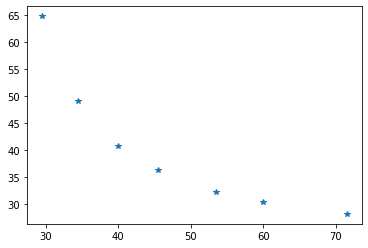

In [7]:
plt.plot(d_objet,d_image,'*')
plt.show() # pour éviter des messages cryptiques inutiles de Matplotlib

Nous allons tracer 1/d_image en fonction de 1/d_objet puis faire un ajustement. Il faut pour cela calculer l'incertitude de ces grandeurs que nous appelons d_1_d_objet et d_1_d_image respectivement.

Pour rappel : $\Delta \frac{1}{f}=\frac{\Delta f}{f^2}$

In [8]:
d_1_d_objet = delta_lentille/d_objet**2
d_1_d_image = delta_d/d_image**2

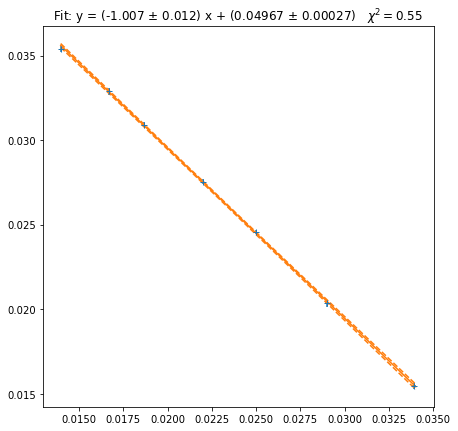

In [9]:
r = fu.linfitxy(1/d_objet, 1/d_image, d_1_d_objet, d_1_d_image)

D'où, avec les notations usuelles, $\frac{1}{OA'}-(1,008±0.012)\cdot\frac{1}{OA}=0.04969±0.00025$ (en cm$^{-1}$). La relation de conjugaison n'est pas mise en défaut (ouf !) et la distance focale $f$ de la lentille est telle que $\frac{1}{f}=0.04969±0.00025\;\textrm{cm}^{-1}$ soit $f=$…

In [10]:
print(r)
f = 1/r[1]
delta_f = r[3]/r[1]**2 
print(f,delta_f)

[-1.00702759e+00  4.96677661e-02  1.21375487e-02  2.69250323e-04]
20.13378249338034 0.10914578740446985


$f=20,14±0,11\;\textrm{cm}$ après correction de JB


Pour ce qui concerne le grandissement :

In [11]:
grandissement = t/t0;
d_grandissement=delta_t/t0;

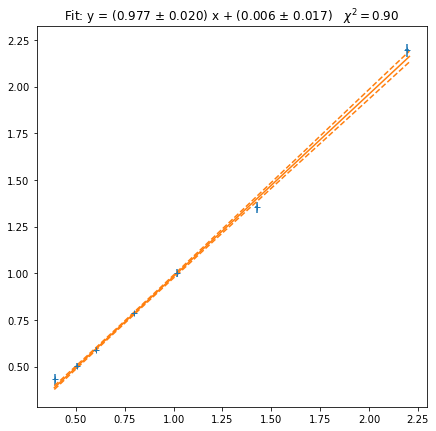

In [12]:
g=fu.linfitxy(d_image/d_objet,grandissement,np.sqrt((delta_lentille/d_objet)**2+(delta_d/d_image)**2),d_grandissement)

In [13]:
z=np.abs((g[0]-1)/g[2])
print(z)

1.1820631492666394
